<a href="https://colab.research.google.com/github/4gusb/e-commerce-analysis/blob/main/e_commerce%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Setup and Config**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from getpass import getpass
import os
from google.colab import data_table


In [2]:
data_table.enable_dataframe_formatter()

In [3]:
import json

# Crea la carpeta ~/.kaggle si no existe
os.makedirs("/root/.kaggle", exist_ok=True)

# Crea el archivo kaggle.json con los campos esperados
kaggle_credentials = {
    "username": "agustinabregant",
    "key": "KGAT_c9f95d301a6d7e219444d69aac406a6f"
}

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_credentials, f)

# Ajusta permisos
!chmod 600 /root/.kaggle/kaggle.json


In [4]:
!ls -lha ~/.kaggle/

total 16K
drwxr-xr-x 2 root root 4.0K Dec  1 01:33 .
drwx------ 1 root root 4.0K Dec  1 01:33 ..
-rw------- 1 root root   79 Dec  1 01:33 kaggle.json


In [5]:
!pip install -q kaggle
!kaggle datasets download -d olistbr/brazilian-ecommerce --force
!unzip -o brazilian-ecommerce.zip

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
  0% 0.00/42.6M [00:00<?, ?B/s]
100% 42.6M/42.6M [00:00<00:00, 1.95GB/s]
Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


## **Loading the DF**

In [6]:
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
categories = pd.read_csv("product_category_name_translation.csv") #translations

In [7]:
for df_name, df in {"orders": orders, "order_items": order_items, "customers": customers, "reviews": reviews, "products": products, "categories": categories}.items():
    print(f"\n\n{df_name.upper()}")
    display(df.head())
    print(df.info())



ORDERS


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


ORDER_ITEMS


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


CUSTOMERS


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


REVIEWS


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


PRODUCTS


product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


CATEGORIES


product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


# **Translation of Products**

In [8]:
products = products.merge(
    categories,
    on="product_category_name",
    how="left"
)

In [9]:
display(products.head())

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

# **Clean Up**


## **Date Types**

In [10]:
#Orders table
date_cols_orders = ["order_purchase_timestamp",
                    "order_approved_at",
                    "order_delivered_carrier_date",
                    "order_delivered_customer_date",
                    "order_estimated_delivery_date"]

for col in date_cols_orders:
    orders[col] = pd.to_datetime(orders[col])


#Orders orders items table
date_cols_items = ["shipping_limit_date"]

for col in date_cols_items:
    order_items[col] = pd.to_datetime(order_items[col])


#Reviews table
date_cols_reviews = ["review_creation_date",
                     "review_answer_timestamp"]

for col in date_cols_reviews:
    reviews[col] = pd.to_datetime(reviews[col])


## **Duplicates**

In [11]:
orders.drop_duplicates(subset="order_id", inplace=True)
order_items.drop_duplicates(inplace=True)
customers.drop_duplicates(subset="customer_id", inplace=True)
reviews.drop_duplicates(subset="review_id", inplace=True)
products.drop_duplicates(subset="product_id", inplace=True)

In [12]:
for df_name, df in {"orders": orders, "order_items": order_items, "customers": customers, "reviews": reviews, "products": products}.items():
    print(f"\n\n{df_name.upper()}")
    display(df.head())
    print(df.info())



ORDERS


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


ORDER_ITEMS


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


CUSTOMERS


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


REVIEWS


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3              Recebi bem antes do prazo estipulado.           2017-04-21   
4  Parabéns lojas lannister adorei comprar pela I...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

<class 'pandas.core.frame.DataFrame'>
Index: 98410 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98410 non-null  object        
 1   order_id                 98410 non-null  object        
 2   review_score             98410 non-null  int64         
 3   review_comment_title     11519 non-null  object        
 4   review_comment_message   40668 non-null  object        
 5   review_creation_date     98410 non-null  datetime64[ns]
 6   review_answer_timestamp  98410 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.0+ MB
None


PRODUCTS


product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1            1000.0               30.0               18.0              20.0   
2             154.0               18.0                9.0              15.0   
3             371.0               26.0                4.0              26.0   
4             625.0               20.0               17.0              13.0   

  product_category_name_english  
0                     perfumery  
1                           art  
2                sports_leisure  
3                          baby  
4                    housewares

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB
None


# **EDA**

### **Checking for Outliers**



In [13]:
order_items["price"].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [14]:
order_items["freight_value"].describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

In [15]:
reviews["review_score"].describe()

count    98410.000000
mean         4.088802
std          1.345758
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

Doesn't seem to be important outliers.

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='purchase_month'>

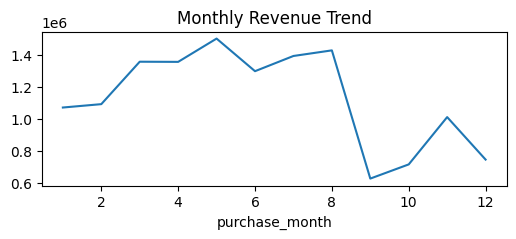

In [16]:
# Monthly revenue

#We add two new derivated columns: purchase month and year

orders["purchase_year"] = orders["order_purchase_timestamp"].dt.year
orders["purchase_month"] = orders["order_purchase_timestamp"].dt.month

revenue_monthly = (
    order_items.merge(orders[["order_id", "purchase_month"]], on="order_id")
               .groupby("purchase_month")["price"].sum()
                )

revenue_monthly.plot(kind="line", figsize=(6,2), title="Monthly Revenue Trend")

<Axes: xlabel='review_score'>

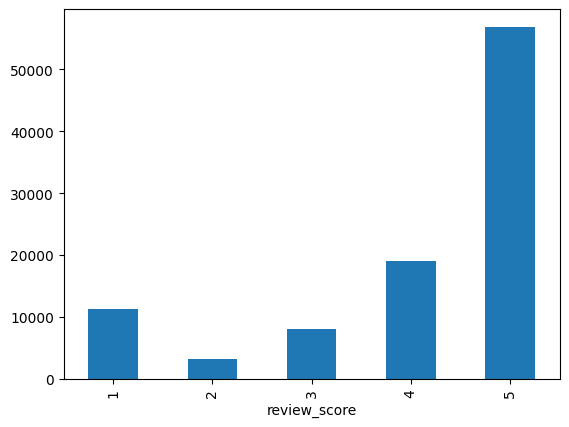

In [17]:
# Reviews score distribution
reviews["review_score"].value_counts().sort_index().plot(kind="bar")


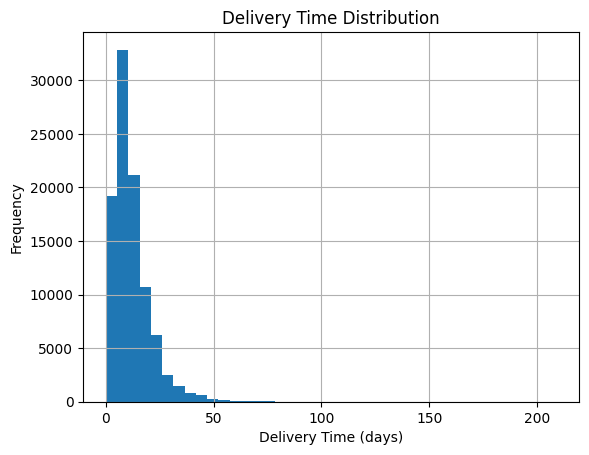

In [73]:
# Delivery time distribution

# Filtramos entregadas
orders_delivered = orders[orders["order_status"] == "delivered"].copy()

#First, we add a derivated column that reflects the amount of days that passed between purchase and delivery dates
orders_delivered["delivery_time_days"] = (
    orders_delivered["order_delivered_customer_date"] - orders_delivered["order_purchase_timestamp"]
).dt.days

#Second, we add another column to identify the estimated amount of delivery days
orders_delivered["delivery_time_estimated_days"] = (
    orders_delivered["order_estimated_delivery_date"] - orders_delivered["order_purchase_timestamp"]
).dt.days

#Third, we add another column to easily identify if the purchase was delivered on time or not (TRUE or FALSE value)
orders_delivered["on_time"] = (
    orders_delivered["delivery_time_days"] <= orders_delivered["delivery_time_estimated_days"]
)

# Histogram
orders_delivered["delivery_time_days"].hist(bins=40)
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Frequency")
plt.show()

In [74]:
orders_delivered[orders_delivered['on_time'] == False]

order_id                       customer_id  \
20     203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
25     fbf9ac61453ac646ce8ad9783d7d0af6  3a874b4d4c4b6543206ff5d89287f0c3   
41     6ea2f835b4556291ffdc53fa0b3b95e8  c7340080e394356141681bd4c9b8fe31   
57     66e4624ae69e7dc89bd50222b59f581f  684fa6da5134b9e4dab731e00011712d   
58     a685d016c8a26f71a0bb67821070e398  911e4c37f5cafe1604fe6767034bf1ae   
...                                 ...                               ...   
99396  b3112ca67f3afd4e20cf2ee91fc4f804  6f83c71b6c044fb156d697d4130fe9b5   
99397  0fa1fab1d7c1211c824596ed5e111e3c  7f3bd6c94d2daf7b6462d1a894a775b4   
99423  38e9133ce29f6bbe35aed9c3863dce01  ad312389a098ceff46ce92c4595c06d0   
99425  d692ef54145c9cb3322ec2e5508aa3f4  82ddfcf9438b0cd1117b55ac33184df8   
99432  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   

      order_status order_purchase_timestamp   order_approved_at  \
20       delivered      2017-09-18 14:31:30 2017-09-19 04:04:09   
25       delivered      2018-02-20 23:46:53 2018-02-22 02:30:46   
41       delivered      2017-11-24 21:27:48 2017-11-25 00:21:09   
57       delivered      2018-03-09 14:50:15 2018-03-09 15:40:39   
58       delivered      2017-03-13 18:14:36 2017-03-13 18:14:36   
...            ...                      ...                 ...   
99396    delivered      2018-08-02 22:46:54 2018-08-02 23:04:06   
99397    delivered      2018-03-13 21:48:57 2018-03-13 22:40:28   
99423    delivered      2017-10-12 20:54:11 2017-10-14 03:28:24   
99425    delivered      2018-03-21 19:47:18 2018-03-21 20:05:26   
99432    delivered      2017-12-20 09:52:41 2017-12-20 10:09:52   

      order_delivered_carrier_date order_delivered_customer_date  \
20             2017-10-06 17:50:03           2017-10-09 22:23:46   
25             2018-02-26 22:25:22           2018-03-21 22:03:54   
41             2017-12-13 21:14:05           2017-12-28 18:59:23   
57             2018-03-15 00:31:19           2018-04-03 13:28:46   
58             2017-03-22 14:03:09           2017-04-06 13:37:16   
...                            ...                           ...   
99396          2018-08-15 17:42:00           2018-08-21 00:03:26   
99397          2018-03-14 19:27:23           2018-04-05 19:59:49   
99423          2017-10-17 17:04:42           2017-11-21 17:06:59   
99425          2018-03-22 21:11:58           2018-04-11 00:48:31   
99432          2017-12-20 20:25:25           2018-01-26 15:45:14   

      order_estimated_delivery_date  purchase_year  purchase_month  \
20                       2017-09-28           2017               9   
25                       2018-03-12           2018               2   
41                       2017-12-21           2017              11   
57                       2018-04-02           2018               3   
58                       2017-03-30           2017               3   
...                             ...            ...             ...   
99396                    2018-08-16           2018               8   
99397                    2018-04-02           2018               3   
99423                    2017-10-31           2017              10   
99425                    2018-04-09           2018               3   
99432                    2018-01-18           2017              12   

       delivery_time_days  delivery_time_estimated_days  on_time  
20                   21.0                             9    False  
25                   28.0                            19    False  
41                   33.0                            26    False  
57                   24.0                            23    False  
58                   23.0                            16    False  
...                   ...                           ...      ...  
99396                18.0                            13    False  
99397                22.0                            19    False  
99423                39.0               

# **Data Integrity Check**

In [19]:
#Looking for Order Items not in Orders

missing_orders = order_items[~order_items["order_id"].isin(orders["order_id"])]
print("Items without an associated order: ", len(missing_orders))

Items without an associated order:  0


In [20]:
#Looking for Products without a name (and therefore, without a category)

products_missing_category = products[products["product_category_name"].isna()]
print(len(products_missing_category))

610


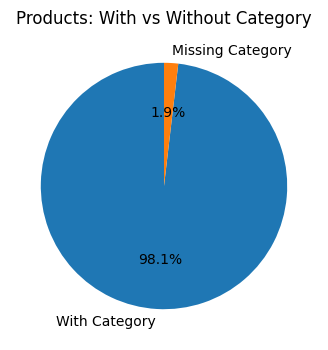

In [21]:
# Pie chart to visualize categorized vs uncategorized products

total_products = len(products)
#print(total_products)
products_missing_category = len(products_missing_category)
products_with_category = total_products - products_missing_category
#print(products_with_category)

plt.figure(figsize=(4,4))
plt.pie(
    [products_with_category, products_missing_category],
    labels=["With Category", "Missing Category"],
    autopct="%1.1f%%",
    colors=['C0', 'C1'],
    startangle=90
)
plt.title("Products: With vs Without Category")
plt.show()

In [22]:
# Checking for orders containing uncategorized products (products without a name)

order_items_and_categories = order_items.merge(
    products[["product_id", "product_category_name", "product_category_name_english"]],
    on="product_id",
    how="left"
)

#we look for the orders that contain at least one uncategorized item, and only keep unique ids (because there are n items per 1 order)
orders_with_missing_cat = (
    order_items_and_categories
      .loc[order_items_and_categories["product_category_name"].isna(), "order_id"].unique()
)

print(len(orders_with_missing_cat))

1451


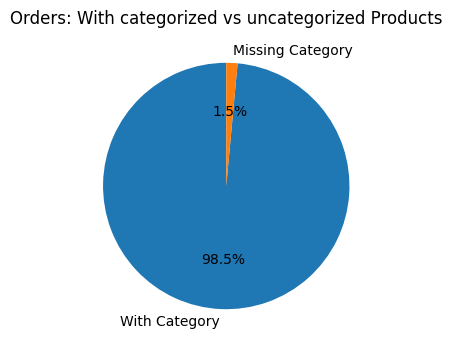

In [23]:
# Pie chart to visualize categorized vs uncategorized orders
total_orders = order_items_and_categories["order_id"].nunique()
#print(total_orders)
orders_with_missing_cat = len(orders_with_missing_cat)
orders_with_category = total_orders - orders_with_missing_cat
#print(orders_with_category)

plt.figure(figsize=(4,4))
plt.pie(
    [orders_with_category, orders_with_missing_cat],
    labels=["With Category", "Missing Category"],
    autopct="%1.1f%%",
    colors=['C0', 'C1'],
    startangle=90
)
plt.title("Orders: With categorized vs uncategorized Products")
plt.show()


In [24]:
#Calculating the revenue that corresponds to orders with uncategorized products
revenue_total = order_items_and_categories["price"].sum()
revenue_missing_category = order_items_and_categories.loc[order_items_and_categories["product_category_name"].isna()]["price"].sum()
revenue_with_category = revenue_total - revenue_missing_category
#print(revenue_total)
#print(revenue_missing_category)
#print(revenue_with_category)

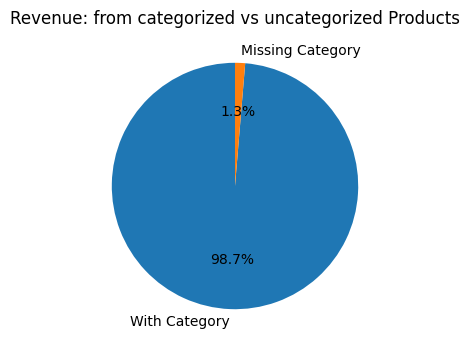

In [25]:
# Pie chart to visualize categorized vs uncategorized revenue

plt.figure(figsize=(4,4))
plt.pie(
    [revenue_with_category, revenue_missing_category],
    labels=["With Category", "Missing Category"],
    autopct="%1.1f%%",
    colors=['C0', 'C1'],
    startangle=90
)
plt.title("Revenue: from categorized vs uncategorized Products")
plt.show()

In [26]:
#Checking that there are no orders completed/approved/delivered with a future date
today = pd.Timestamp.today()

date_cols_to_check = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date"
]

for col in date_cols_to_check:
    future_dates = orders[orders[col] > today]
    print(f"{col}: {len(future_dates)} rows with future dates")
    display(future_dates.head())

order_purchase_timestamp: 0 rows with future dates


Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, purchase_year, purchase_month, delivery_time_days, on_time]
Index: []

order_approved_at: 0 rows with future dates


Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, purchase_year, purchase_month, delivery_time_days, on_time]
Index: []

order_delivered_carrier_date: 0 rows with future dates


Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, purchase_year, purchase_month, delivery_time_days, on_time]
Index: []

order_delivered_customer_date: 0 rows with future dates


Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, purchase_year, purchase_month, delivery_time_days, on_time]
Index: []

In [27]:
#checking for orders without Status
orders[orders["order_status"].isna()].head()

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, purchase_year, purchase_month, delivery_time_days, on_time]
Index: []